OPTIMIZERS USING MNIST DATA

C:\Users\Lalit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(



Training with Batch Gradient Descent...
Epoch 1/5
1500/1500 - 14s - 9ms/step - accuracy: 0.8076 - loss: 0.6404 - val_accuracy: 0.9367 - val_loss: 0.2103
Epoch 2/5
1500/1500 - 15s - 10ms/step - accuracy: 0.9471 - loss: 0.1774 - val_accuracy: 0.9631 - val_loss: 0.1305
Epoch 3/5
1500/1500 - 17s - 11ms/step - accuracy: 0.9640 - loss: 0.1193 - val_accuracy: 0.9709 - val_loss: 0.1002
Epoch 4/5
1500/1500 - 16s - 10ms/step - accuracy: 0.9712 - loss: 0.0941 - val_accuracy: 0.9754 - val_loss: 0.0861
Epoch 5/5
1500/1500 - 16s - 10ms/step - accuracy: 0.9755 - loss: 0.0793 - val_accuracy: 0.9773 - val_loss: 0.0793

Training with Stochastic Gradient Descent...
Epoch 1/5
1500/1500 - 17s - 11ms/step - accuracy: 0.9368 - loss: 0.2057 - val_accuracy: 0.9777 - val_loss: 0.0748
Epoch 2/5
1500/1500 - 14s - 9ms/step - accuracy: 0.9797 - loss: 0.0649 - val_accuracy: 0.9848 - val_loss: 0.0535
Epoch 3/5
1500/1500 - 16s - 11ms/step - accuracy: 0.9861 - loss: 0.0443 - val_accuracy: 0.9847 - val_loss: 0.0500
Epo

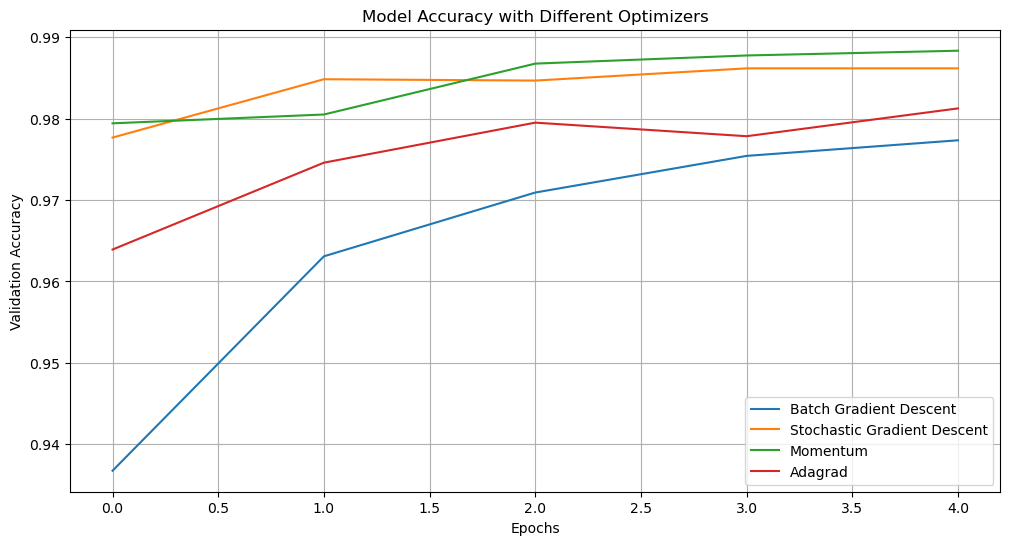

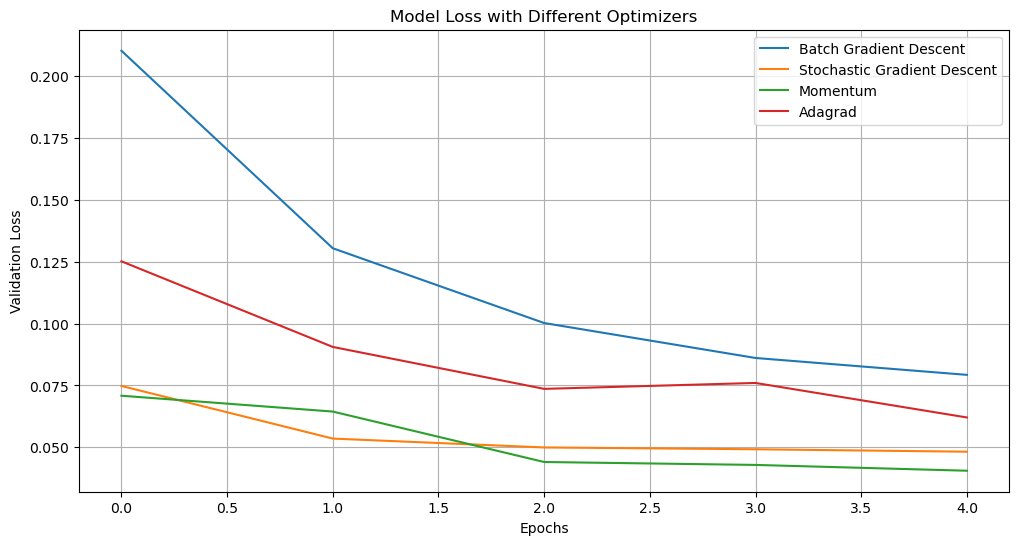

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape((60000, 28, 28, 1))  # Reshape for CNN
X_test = X_test.reshape((10000, 28, 28, 1))
X_train = X_train.astype('float32') / 255  # Normalize to [0, 1]
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train, 10)  # One-hot encode labels
y_test = to_categorical(y_test, 10)

# Create a simple CNN model
def create_model(optimizer):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Optimizers
optimizers = {
    'Batch Gradient Descent': 'sgd',  # Using SGD as a representation
    'Stochastic Gradient Descent': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Momentum': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Adagrad': tf.keras.optimizers.Adagrad(learning_rate=0.01),
}

# Train and evaluate models using different optimizers
results = {}
for name, optimizer in optimizers.items():
    model = create_model(optimizer)
    print(f"\nTraining with {name}...")
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)
    results[name] = history.history

# Plot accuracy for each optimizer
plt.figure(figsize=(12, 6))
for name, history in results.items():
    plt.plot(history['val_accuracy'], label=name)
    
plt.title('Model Accuracy with Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss for each optimizer
plt.figure(figsize=(12, 6))
for name, history in results.items():
    plt.plot(history['val_loss'], label=name)

plt.title('Model Loss with Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()


OPTIMIZERS USING RANDOM DATA

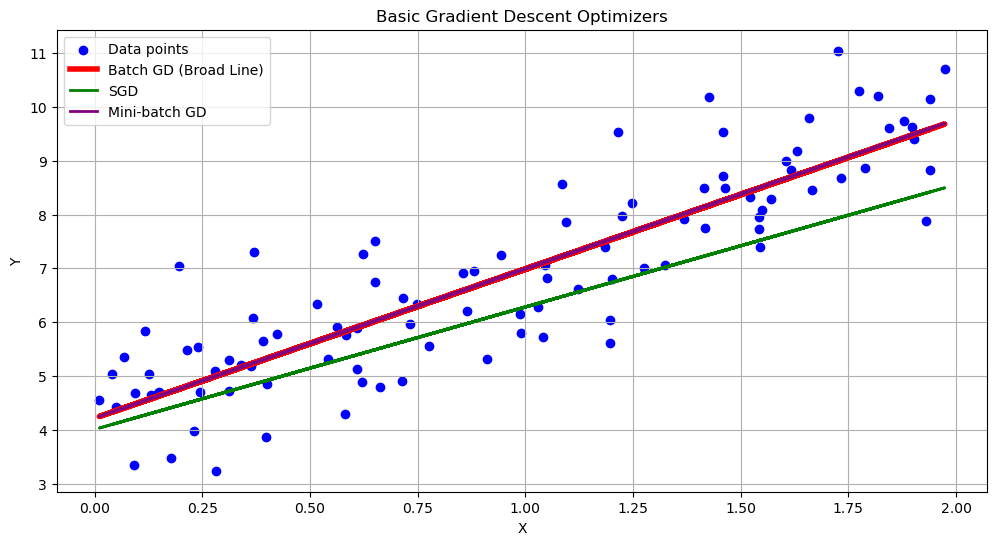

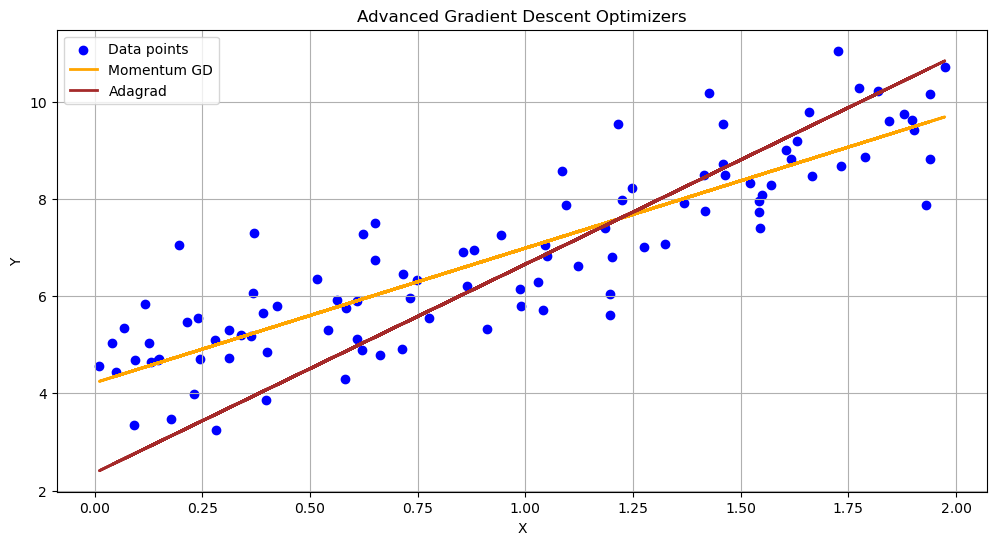

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

# Add bias term (intercept)
X_b = np.c_[np.ones((100, 1)), x]

# Function to compute cost
def compute_cost(X, y, theta):
    m = len(y)
    return (1/m) * np.sum((X.dot(theta) - y) ** 2)

# Batch Gradient Descent with cost tracking
def batch_gradient_descent(X, y, learning_rate=0.1, iterations=1000):
    m = len(X)
    theta = np.random.randn(2, 1)  # Random initialization
    for i in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.1, n_epochs=50):
    m = len(y)
    theta = np.random.randn(2, 1)  # Random initialization
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    return theta

# Mini-batch Gradient Descent with cost tracking
def mini_batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=50, batch_size=20):
    m = len(y)
    theta = np.random.randn(2, 1)  # Random initialization
    for iteration in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]
            gradients = 2/len(xi) * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    return theta

# Momentum-based Gradient Descent
def gradient_descent_momentum(X, y, learning_rate=0.01, iterations=1000, gamma=0.9):
    m = len(y)
    theta = np.zeros((X.shape[1], 1))  # Zero initialization
    velocity = np.zeros_like(theta)
    for i in range(iterations):
        gradients = 1/m * X.T.dot(X.dot(theta) - y)
        velocity = gamma * velocity - learning_rate * gradients
        theta += velocity
    return theta

# Adagrad
def adagrad(X, y, learning_rate=0.1, epsilon=1e-8, iterations=1000):
    m = len(y)
    theta = np.random.randn(2, 1)  # Random initialization
    gradient_accum = np.zeros_like(theta)
    for i in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        gradient_accum += gradients ** 2
        adjusted_gradients = gradients / (np.sqrt(gradient_accum) + epsilon)
        theta -= learning_rate * adjusted_gradients
    return theta

# Calculate thetas for basic optimizers
theta_bgd = batch_gradient_descent(X_b, y)
theta_sgd = stochastic_gradient_descent(X_b, y)
theta_mbgd = mini_batch_gradient_descent(X_b, y)

# Calculate thetas for advanced optimizers
theta_momentum = gradient_descent_momentum(X_b, y)
theta_adagrad = adagrad(X_b, y)

# Plotting for Basic Optimizers
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, X_b.dot(theta_bgd), color='red', linewidth=4, label='Batch GD (Broad Line)')  # Broader line for BGD
plt.plot(x, X_b.dot(theta_sgd), color='green', linewidth=2, label='SGD')
plt.plot(x, X_b.dot(theta_mbgd), color='purple', linewidth=2, label='Mini-batch GD')

# Labels and legend for basic optimizers
plt.title('Basic Gradient Descent Optimizers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

# Plotting for Advanced Optimizers
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, X_b.dot(theta_momentum), color='orange', linewidth=2, label='Momentum GD')
plt.plot(x, X_b.dot(theta_adagrad), color='brown', linewidth=2, label='Adagrad')

# Labels and legend for advanced optimizers
plt.title('Advanced Gradient Descent Optimizers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()
